#Data Preparation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##Import data

In [ ]:
d20 = pd.read_excel("/content/drive/MyDrive/PI/dataset/data_2020.xlsx",index_col=0)
d21 = pd.read_excel("/content/drive/MyDrive/PI/dataset/data_2021.xlsx", index_col=0)
d22 = pd.read_excel("/content/drive/MyDrive/PI/dataset/data_2022.xlsx", index_col=0)

df_truth = pd.read_excel("/content/drive/MyDrive/PI/dataset/real_news.xlsx")

###Menggabungkan beberapa Dataset menjadi satu dataset


In [ ]:
# d20_1 = pd.read_excel("/content/data_2020_1-Jan.xlsx",index_col=0)
# d20_2 = pd.read_excel("/content/data_2020_2-feb.xlsx", index_col =0)
# d20_3 = pd.read_excel("/content/data_2020_3-maret.xlsx", index_col = 0)

df_hoax= d20.append([d21,d22], ignore_index = False)


##EDA

In [ ]:
df_hoax.tail()

In [ ]:
df_hoax.shape

(4810, 2)

In [ ]:
df_hoax.info

In [ ]:
df_hoax.describe()

In [ ]:
df_hoax['Kategori'].unique()

array(['Politik', 'Sains', 'Sosial', 'Bencana', 'Entertainment',
       'Teknologi', 'Ekonomi'], dtype=object)

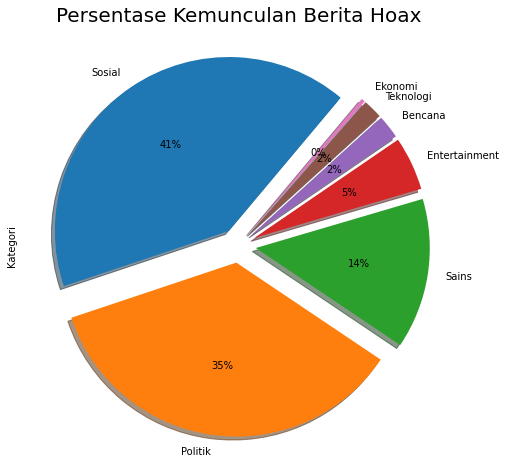

In [ ]:
df_hoax['Kategori'].value_counts().plot.pie(figsize = (10,8),autopct='%0.0f%%' ,startangle = 50,shadow=True,explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Persentase Kemunculan Berita Hoax', fontsize = 20)
plt.show()

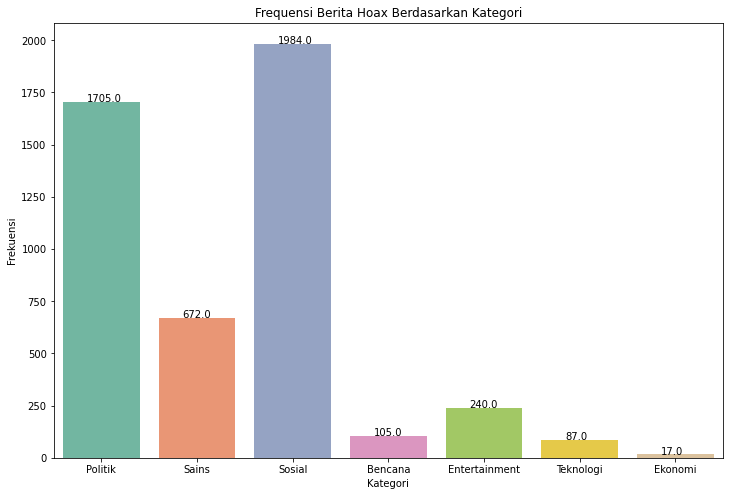

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='Kategori',data=df_hoax, palette="Set2")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.ylabel('Frekuensi')
plt.xlabel('Kategori')
plt.title('Frequensi Berita Hoax Berdasarkan Kategori')
plt.show()

In [ ]:
#menghapus column yang tak digunakan lagi
del df_hoax['Tanggal'],df_hoax['Link'],df_hoax['Kategori']

#TEXT MINING

In [ ]:
#Labelling Class Berita Hoax dan Truth
df_hoax["class"] = 0
df_truth["class"] = 1

In [ ]:
df_hoax.shape , df_truth.shape

((4810, 2), (4731, 2))

In [ ]:
#Menggabungkan Berita Hoax dan Truth
df = pd.concat([df_hoax, df_truth], axis=0)
df.head(10)

,Judul,class
1,Warga Israel Ikut Gugat Anies Baswedan Akibat...,0
2,Virus Corona Sudah Sampai di Shah Alam Selangor,0
3,Narasi TKA di Video Demo PT IMIP Morowali,0
4,Vaksin Penyebab Autis,0
5,"“Diduga Terjangkit Virus Corona, Satu Pasien ...",0
6,“Mayat orang Cina bergelimpangan di jalan kot...,0
7,Foto “SAYA LEBIH HEBAT DARI IBU SUSI Tenggela...,0
8,Pesan Berantai Biaya Tilang Baru,0
9,Bendungan Bili-Bili Melewati Batas Angka Normal,0
10,"“Foto Musim Dingin Anak-Anak di Gaza, Palestina”",0


In [ ]:
df.shape , df.columns

((9541, 2), Index(['Judul', 'class'], dtype='object'))

In [ ]:
#Random Shuffling the DataFrame
df = df.sample(frac=1)
df.head(10)

,Judul,class
563,Foto “Lihatlah Kebiadapan Israel Ini”,0
2788,Daftar Bumbu Masakan Mengandung Babi,0
1345,“1918 flu pandemic” photo,0
2572,Kumham Hapus Sanksi Pidana setelah Anak Buah ...,0
426,The “pray for italy” Video,0
4234,Wali Kota Jakut Buka Sosialisasi Gerakan Kelua...,1
4669,Setu Babakan Dideklarasikan sebagai Simbol Keb...,1
1525,“DemokratIklan Jokowi di Bioskop Mengganggu Ha...,1
1619,“Ustadz di Aceh Tenggara Diserang Seorang Pria...,1
4156,Gunung Welirang Jawa Timur Erupsi,0


In [ ]:
#Case Folding
import re

def cfm(judul):
  judul = judul.lower()
  judul = re.sub(r'@\w+','',judul)
  judul = re.sub(r'\b\w{1,3}\b','"',judul)
  judul = re.sub(r'\s+',' ',judul)
  judul = re.sub(r'#\w+',' ',judul)
  judul = re.sub(r'^\s+'," ",judul)
  judul = re.sub(r'\W'," ",judul)
  return judul

df['Judul1'] = df['Judul'].apply(lambda x: cfm(x))
df


,Judul,class,Judul1
563,Foto “Lihatlah Kebiadapan Israel Ini”,0,foto lihatlah kebiadapan israel
2788,Daftar Bumbu Masakan Mengandung Babi,0,daftar bumbu masakan mengandung babi
1345,“1918 flu pandemic” photo,0,1918 pandemic photo
2572,Kumham Hapus Sanksi Pidana setelah Anak Buah ...,0,kumham hapus sanksi pidana setelah anak buah ...
426,The “pray for italy” Video,0,pray italy video
...,...,...,...
1675,Akun Facebook Pribadi Bupati Lampung Barat Pa...,0,akun facebook pribadi bupati lampung barat pa...
1804,"Baru Latihan Yel Yel untuk Demo, Anak-Anak TK...",0,baru latihan untuk demo anak anak ta...
4367,Pemkot Jakut Antisipasi 25 Titik Rawan Genangan,1,pemkot jakut antisipasi titik rawan genangan
386,Respons PSSI Usai Laga Timnas Indonesia Vs Tim...,1,respons pssi usai laga timnas indonesia timo...


In [ ]:
df = df.drop_duplicates()
df.shape

(9489, 3)

In [ ]:
df['class'].value_counts()

0    4797
1    4692
Name: class, dtype: int64

In [ ]:
#Remove Features Judul
del df['Judul']
df

,class,Judul1
734,0,keluarkan nasi dari rice cooker jika sudah m...
3215,0,photo year child committed suicide ...
1825,1,persipura persib ambisi maung bandung kemba...
2613,1,begini kondisi rumah yang membuat masyarakat i...
3541,1,persija persib misi revans maung bandung
...,...,...
971,0,workshop peningkatan kapasitas pemerintah dae...
4535,0,game omicron sejak tahun
2520,0,minum dengan batang lada dapat sembuhkan co...
1504,0,perusak polisi ciracas adalah polisi sendiri


In [ ]:
import nltk
nltk.download('punkt')

df['Judul2']=df.apply(lambda row: nltk.word_tokenize(row["Judul1"]), axis=1)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Judul,class,Judul1,Judul2
563,Foto “Lihatlah Kebiadapan Israel Ini”,0,foto lihatlah kebiadapan israel,"[foto, lihatlah, kebiadapan, israel]"
2788,Daftar Bumbu Masakan Mengandung Babi,0,daftar bumbu masakan mengandung babi,"[daftar, bumbu, masakan, mengandung, babi]"
1345,“1918 flu pandemic” photo,0,1918 pandemic photo,"[1918, pandemic, photo]"
2572,Kumham Hapus Sanksi Pidana setelah Anak Buah ...,0,kumham hapus sanksi pidana setelah anak buah ...,"[kumham, hapus, sanksi, pidana, setelah, anak,..."
426,The “pray for italy” Video,0,pray italy video,"[pray, italy, video]"
...,...,...,...,...
1675,Akun Facebook Pribadi Bupati Lampung Barat Pa...,0,akun facebook pribadi bupati lampung barat pa...,"[akun, facebook, pribadi, bupati, lampung, bar..."
1804,"Baru Latihan Yel Yel untuk Demo, Anak-Anak TK...",0,baru latihan untuk demo anak anak ta...,"[baru, latihan, untuk, demo, anak, anak, tangk..."
4367,Pemkot Jakut Antisipasi 25 Titik Rawan Genangan,1,pemkot jakut antisipasi titik rawan genangan,"[pemkot, jakut, antisipasi, titik, rawan, gena..."
386,Respons PSSI Usai Laga Timnas Indonesia Vs Tim...,1,respons pssi usai laga timnas indonesia timo...,"[respons, pssi, usai, laga, timnas, indonesia,..."


In [ ]:
#Referensi : https://github.com/har07/PySastrawi/blob/master/src/Sastrawi/StopWordRemover/StopWordRemoverFactory.py
class StopWordRemoverFactory(object):
    """description of class"""

    def create_stop_word_remover(self):
        stopWords = self.get_stop_words()
        dictionary = ArrayDictionary(stopWords)
        stopWordRemover = StopWordRemover(dictionary)

        return stopWordRemover

    def get_stop_words(self):
        return ['a','ada','adalah','adanya','adapun','agak','agaknya','agar','akan','akankah','akhir',
            'akhiri','akhirnya','aku','akulah','amat','amatlah','anda','andalah','antar','antara',
            'antaranya','apa','apaan','apabila','apakah','apalagi','apatah','arti','artinya','asal',
            'asalkan','atas','atau','ataukah','ataupun','awal','awalnya','b','bagai','bagaikan',
            'bagaimana','bagaimanakah','bagaimanapun','bagainamakah','bagi','bagian','bahkan','bahwa',
            'bahwasannya','bahwasanya','baik','baiklah','bakal','bakalan','balik','banyak','bapak',
            'baru','bawah','beberapa','begini','beginian','beginikah','beginilah','begitu','begitukah',
            'begitulah','begitupun','bekerja','belakang','belakangan','belum','belumlah','benar',
            'benarkah','benarlah','berada','berakhir','berakhirlah','berakhirnya','berapa','berapakah',
            'berapalah','berapapun','berarti','berawal','berbagai','berdatangan','beri','berikan',
            'berikut','berikutnya','berjumlah','berkali-kali','berkata','berkehendak','berkeinginan',
            'berkenaan','berlainan','berlalu','berlangsung','berlebihan','bermacam','bermacam-macam',
            'bermaksud','bermula','bersama','bersama-sama','bersiap','bersiap-siap','bertanya',
            'bertanya-tanya','berturut','berturut-turut','bertutur','berujar','berupa','besar',
            'betul','betulkah','biasa','biasanya','bila','bilakah','bisa','bisakah','boleh','bolehkah',
            'bolehlah','buat','bukan','bukankah','bukanlah','bukannya','bulan','bung','c','cara',
            'caranya','cukup','cukupkah','cukuplah','cuma','d','dahulu','dalam','dan','dapat','dari',
            'daripada','datang','dekat','demi','demikian','demikianlah','dengan','depan','di','dia',
            'diakhiri','diakhirinya','dialah','diantara','diantaranya','diberi','diberikan','diberikannya',
            'dibuat','dibuatnya','didapat','didatangkan','digunakan','diibaratkan','diibaratkannya',
            'diingat','diingatkan','diinginkan','dijawab','dijelaskan','dijelaskannya','dikarenakan',
            'dikatakan','dikatakannya','dikerjakan','diketahui','diketahuinya','dikira','dilakukan',
            'dilalui','dilihat','dimaksud','dimaksudkan','dimaksudkannya','dimaksudnya','diminta',
            'dimintai','dimisalkan','dimulai','dimulailah','dimulainya','dimungkinkan','dini','dipastikan',
            'diperbuat','diperbuatnya','dipergunakan','diperkirakan','diperlihatkan','diperlukan',
            'diperlukannya','dipersoalkan','dipertanyakan','dipunyai','diri','dirinya','disampaikan',
            'disebut','disebutkan','disebutkannya','disini','disinilah','ditambahkan','ditandaskan',
            'ditanya','ditanyai','ditanyakan','ditegaskan','ditujukan','ditunjuk','ditunjuki','ditunjukkan',
            'ditunjukkannya','ditunjuknya','dituturkan','dituturkannya','diucapkan','diucapkannya',
            'diungkapkan','dong','dua','dulu','e','empat','enak','enggak','enggaknya','entah','entahlah',
            'f','g','guna','gunakan','h','hadap','hai','hal','halo','hallo','hampir','hanya','hanyalah',
            'hari','harus','haruslah','harusnya','helo','hello','hendak','hendaklah','hendaknya','hingga',
            'i','ia','ialah','ibarat','ibaratkan','ibaratnya','ibu','ikut','ingat','ingat-ingat','ingin',
            'inginkah','inginkan','ini','inikah','inilah','itu','itukah','itulah','j','jadi','jadilah',
            'jadinya','jangan','jangankan','janganlah','jauh','jawab','jawaban','jawabnya','jelas',
            'jelaskan','jelaslah','jelasnya','jika','jikalau','juga','jumlah','jumlahnya','justru',
            'k','kadar','kala','kalau','kalaulah','kalaupun','kali','kalian','kami','kamilah','kamu',
            'kamulah','kan','kapan','kapankah','kapanpun','karena','karenanya','kasus','kata','katakan',
            'katakanlah','katanya','ke','keadaan','kebetulan','kecil','kedua','keduanya','keinginan',
            'kelamaan','kelihatan','kelihatannya','kelima','keluar','kembali','kemudian','kemungkinan',
            'kemungkinannya','kena','kenapa','kepada','kepadanya','kerja','kesampaian','keseluruhan',
            'keseluruhannya','keterlaluan','ketika','khusus','khususnya','kini','kinilah','kira',
            'kira-kira','kiranya','kita','kitalah','kok','kurang','l','lagi','lagian','lah','lain',
            'lainnya','laku','lalu','lama','lamanya','langsung','lanjut','lanjutnya','lebih','lewat',
            'lihat','lima','luar','m','macam','maka','makanya','makin','maksud','malah','malahan',
            'mampu','mampukah','mana','manakala','manalagi','masa','masalah','masalahnya','masih',
            'masihkah','masing','masing-masing','masuk','mata','mau','maupun','melainkan','melakukan',
            'melalui','melihat','melihatnya','memang','memastikan','memberi','memberikan','membuat',
            'memerlukan','memihak','meminta','memintakan','memisalkan','memperbuat','mempergunakan',
            'memperkirakan','memperlihatkan','mempersiapkan','mempersoalkan','mempertanyakan','mempunyai',
            'memulai','memungkinkan','menaiki','menambahkan','menandaskan','menanti','menanti-nanti',
            'menantikan','menanya','menanyai','menanyakan','mendapat','mendapatkan','mendatang','mendatangi',
            'mendatangkan','menegaskan','mengakhiri','mengapa','mengatakan','mengatakannya','mengenai',
            'mengerjakan','mengetahui','menggunakan','menghendaki','mengibaratkan','mengibaratkannya',
            'mengingat','mengingatkan','menginginkan','mengira','mengucapkan','mengucapkannya','mengungkapkan',
            'menjadi','menjawab','menjelaskan','menuju','menunjuk','menunjuki','menunjukkan','menunjuknya',
            'menurut','menuturkan','menyampaikan','menyangkut','menyatakan','menyebutkan','menyeluruh',
            'menyiapkan','merasa','mereka','merekalah','merupakan','meski','meskipun','meyakini','meyakinkan',
            'minta','mirip','misal','misalkan','misalnya','mohon','mula','mulai','mulailah','mulanya','mungkin',
            'mungkinkah','n','nah','naik','namun','nanti','nantinya','nya','nyaris','nyata','nyatanya',
            'o','oleh','olehnya','orang','p','pada','padahal','padanya','pak','paling','panjang','pantas',
            'para','pasti','pastilah','penting','pentingnya','per','percuma','perlu','perlukah','perlunya',
            'pernah','persoalan','pertama','pertama-tama','pertanyaan','pertanyakan','pihak','pihaknya',
            'pukul','pula','pun','punya','q','r','rasa','rasanya','rupa','rupanya','s','saat','saatnya','saja',
            'sajalah','salam','saling','sama','sama-sama','sambil','sampai','sampai-sampai','sampaikan','sana',
            'sangat','sangatlah','sangkut','satu','saya','sayalah','se','sebab','sebabnya','sebagai',
            'sebagaimana','sebagainya','sebagian','sebaik','sebaik-baiknya','sebaiknya','sebaliknya',
            'sebanyak','sebegini','sebegitu','sebelum','sebelumnya','sebenarnya','seberapa','sebesar',
            'sebetulnya','sebisanya','sebuah','sebut','sebutlah','sebutnya','secara','secukupnya','sedang',
            'sedangkan','sedemikian','sedikit','sedikitnya','seenaknya','segala','segalanya','segera',
            'seharusnya','sehingga','seingat','sejak','sejauh','sejenak','sejumlah','sekadar','sekadarnya',
            'sekali','sekali-kali','sekalian','sekaligus','sekalipun','sekarang','sekaranglah','sekecil',
            'seketika','sekiranya','sekitar','sekitarnya','sekurang-kurangnya','sekurangnya','sela','selain',
            'selaku','selalu','selama','selama-lamanya','selamanya','selanjutnya','seluruh','seluruhnya',
            'semacam','semakin','semampu','semampunya','semasa','semasih','semata','semata-mata','semaunya',
            'sementara','semisal','semisalnya','sempat','semua','semuanya','semula','sendiri','sendirian',
            'sendirinya','seolah','seolah-olah','seorang','sepanjang','sepantasnya','sepantasnyalah',
            'seperlunya','seperti','sepertinya','sepihak','sering','seringnya','serta','serupa','sesaat',
            'sesama','sesampai','sesegera','sesekali','seseorang','sesuatu','sesuatunya','sesudah',
            'sesudahnya','setelah','setempat','setengah','seterusnya','setiap','setiba','setibanya',
            'setidak-tidaknya','setidaknya','setinggi','seusai','sewaktu','siap','siapa','siapakah',
            'siapapun','sini','sinilah','soal','soalnya','suatu','sudah','sudahkah','sudahlah','supaya',
            't','tadi','tadinya','tahu','tak','tambah','tambahnya','tampak','tampaknya','tandas','tandasnya',
            'tanpa','tanya','tanyakan','tanyanya','tapi','tegas','tegasnya','telah','tempat','tentang','tentu',
            'tentulah','tentunya','tepat','terakhir','terasa','terbanyak','terdahulu','terdapat','terdiri',
            'terhadap','terhadapnya','teringat','teringat-ingat','terjadi','terjadilah','terjadinya','terkira',
            'terlalu','terlebih','terlihat','termasuk','ternyata','tersampaikan','tersebut','tersebutlah',
            'tertentu','tertuju','terus','terutama','tetap','tetapi','tiap','tiba','tiba-tiba','tidak',
            'tidakkah','tidaklah','tiga','toh','tuju','tunjuk','turut','tutur','tuturnya','u','ucap','ucapnya',
            'ujar','ujarnya','umumnya','ungkap','ungkapnya','untuk','usah','usai','v','w','waduh','wah','wahai',
            'waktunya','walau','walaupun','wong','x','y','ya','yaitu','yakin','yakni','yang','z']

In [ ]:
# !pip install Sastrawi
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
def stopword(text):
  text = [ w for w in text if not w in stopwords]
  text = " ".join(text)
  return text
df['swjudul'] = df['Judul2'].apply(stopword)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Judul,class,Judul1,Judul2,swjudul
563,Foto “Lihatlah Kebiadapan Israel Ini”,0,foto lihatlah kebiadapan israel,"[foto, lihatlah, kebiadapan, israel]",foto lihatlah kebiadapan israel
2788,Daftar Bumbu Masakan Mengandung Babi,0,daftar bumbu masakan mengandung babi,"[daftar, bumbu, masakan, mengandung, babi]",daftar bumbu masakan mengandung babi
1345,“1918 flu pandemic” photo,0,1918 pandemic photo,"[1918, pandemic, photo]",1918 pandemic photo
2572,Kumham Hapus Sanksi Pidana setelah Anak Buah ...,0,kumham hapus sanksi pidana setelah anak buah ...,"[kumham, hapus, sanksi, pidana, setelah, anak,...",kumham hapus sanksi pidana anak buah megawati ...
426,The “pray for italy” Video,0,pray italy video,"[pray, italy, video]",pray italy video
...,...,...,...,...,...
1675,Akun Facebook Pribadi Bupati Lampung Barat Pa...,0,akun facebook pribadi bupati lampung barat pa...,"[akun, facebook, pribadi, bupati, lampung, bar...",akun facebook pribadi bupati lampung barat par...
1804,"Baru Latihan Yel Yel untuk Demo, Anak-Anak TK...",0,baru latihan untuk demo anak anak ta...,"[baru, latihan, untuk, demo, anak, anak, tangk...",latihan demo anak anak tangkap polisi
4367,Pemkot Jakut Antisipasi 25 Titik Rawan Genangan,1,pemkot jakut antisipasi titik rawan genangan,"[pemkot, jakut, antisipasi, titik, rawan, gena...",pemkot jakut antisipasi titik rawan genangan
386,Respons PSSI Usai Laga Timnas Indonesia Vs Tim...,1,respons pssi usai laga timnas indonesia timo...,"[respons, pssi, usai, laga, timnas, indonesia,...",respons pssi laga timnas indonesia timor leste...


In [ ]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def Stemming(text):
  factory= StemmerFactory()
  stemmer = factory.create_stemmer()
  text = text.split()
  hasil = [stemmer.stem(token) for token in text]
  hasil = " ".join(hasil)
  return hasil

df['Judul'] = df['swjudul'].apply(Stemming)
df


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.3 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Judul,class,Judul1,Judul2,swjudul
563,foto lihat kebiadapan israel,0,foto lihatlah kebiadapan israel,"[foto, lihatlah, kebiadapan, israel]",foto lihatlah kebiadapan israel
2788,daftar bumbu masakan kandung babi,0,daftar bumbu masakan mengandung babi,"[daftar, bumbu, masakan, mengandung, babi]",daftar bumbu masakan mengandung babi
1345,1918 pandemic photo,0,1918 pandemic photo,"[1918, pandemic, photo]",1918 pandemic photo
2572,kumham hapus sanksi pidana anak buah megawati ...,0,kumham hapus sanksi pidana setelah anak buah ...,"[kumham, hapus, sanksi, pidana, setelah, anak,...",kumham hapus sanksi pidana anak buah megawati ...
426,pray italy video,0,pray italy video,"[pray, italy, video]",pray italy video
...,...,...,...,...,...
1675,akun facebook pribadi bupati lampung barat par...,0,akun facebook pribadi bupati lampung barat pa...,"[akun, facebook, pribadi, bupati, lampung, bar...",akun facebook pribadi bupati lampung barat par...
1804,latih demo anak anak tangkap polisi,0,baru latihan untuk demo anak anak ta...,"[baru, latihan, untuk, demo, anak, anak, tangk...",latihan demo anak anak tangkap polisi
4367,pemkot jakut antisipasi titik rawan genang,1,pemkot jakut antisipasi titik rawan genangan,"[pemkot, jakut, antisipasi, titik, rawan, gena...",pemkot jakut antisipasi titik rawan genangan
386,respons pssi laga timnas indonesia timor leste...,1,respons pssi usai laga timnas indonesia timo...,"[respons, pssi, usai, laga, timnas, indonesia,...",respons pssi laga timnas indonesia timor leste...


In [ ]:
#Menghapus Column yang sudah tidak terpakai
del df['Judul1'],df['Judul2'],df['swjudul']

In [ ]:
df

,Judul,class
563,foto lihat kebiadapan israel,0
2788,daftar bumbu masakan kandung babi,0
1345,1918 pandemic photo,0
2572,kumham hapus sanksi pidana anak buah megawati ...,0
426,pray italy video,0
...,...,...
1675,akun facebook pribadi bupati lampung barat par...,0
1804,latih demo anak anak tangkap polisi,0
4367,pemkot jakut antisipasi titik rawan genang,1
386,respons pssi laga timnas indonesia timor leste...,1


In [ ]:
df.to_excel('Fixed_data.xlsx', index=False)

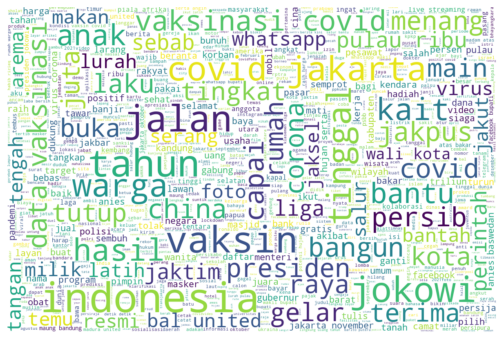

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000, max_font_size=100, random_state=25,
               width=1200, height=800).generate(''.join(df['Judul']))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

#Load data

In [ ]:
#SEMENTARA
df_nielsen = pd.read_csv("/content/drive/MyDrive/PI/dataset/Fixed_data.xlsx")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9489 entries, 0 to 9488
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Judul   9489 non-null   object
 1   class   9489 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 148.4+ KB


*italicized text*##Pembobotan

In [ ]:
x = df['Judul']
y = df['class']

In [ ]:
y.value_counts()

0    4797
1    4692
Name: class, dtype: int64

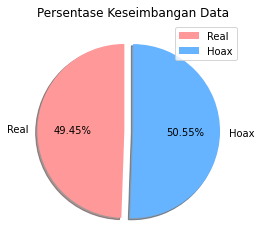

In [ ]:
##Diagram pie untuk melihat keseimbangan data
labels = ['Real','Hoax']
Category2 = [4692,4797]
color=['#ff9999','#66b3ff']
plt.pie(Category2,labels=labels,colors=color,startangle=90,shadow=True,autopct='%1.2f%%',explode=(0.1,0))
plt.title('Persentase Keseimbangan Data')
plt.legend()
plt.savefig("PKD_sblm.png")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.3, random_state=0)

##TEST nilai

In [ ]:
x_train.shape

(6642,)

In [ ]:
x_test.shape

(2847,)

##LANJUT pembobotan

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf vectorizer
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

tfidf

TfidfVectorizer()

In [ ]:
print(x_train_tfidf[0])
x_train[0]

  (0, 3666)	0.4964313970622142
  (0, 7237)	0.3986067891540833
  (0, 6515)	0.4725116083547694
  (0, 2717)	0.33379585156452063
  (0, 2979)	0.33569903137543056
  (0, 5574)	0.38378088205776195


'foto lihat kebiadapan israel'

In [ ]:
print(x_test_tfidf)

  (0, 6780)	0.39847230328754585
  (0, 6222)	0.2978548241402747
  (0, 4823)	0.4890786534234781
  (0, 3435)	0.3888748642685135
  (0, 2446)	0.5100274534948644
  (0, 715)	0.31930038308190384
  (1, 7868)	0.9023011596098429
  (1, 2960)	0.4311062715465095
  (2, 6657)	0.7208236767061982
  (2, 2605)	0.6060566240136506
  (2, 65)	0.33631621368726006
  (3, 7127)	0.41610449865447585
  (3, 6680)	0.37493441943245664
  (3, 6571)	0.3698863984070912
  (3, 5342)	0.277756608863508
  (3, 4340)	0.3405839538134005
  (3, 1845)	0.5054121562734649
  (3, 703)	0.31761245020664225
  (4, 4944)	0.3898058692337955
  (4, 4464)	0.3485699336174446
  (4, 4103)	0.3068399066601192
  (4, 3818)	0.4095388744428306
  (4, 3757)	0.4095388744428306
  (4, 3593)	0.3700728640247603
  (4, 2981)	0.2242778267286145
  :	:
  (2840, 7684)	0.6340910808995668
  (2840, 7075)	0.3964747346423428
  (2840, 5253)	0.6638797224753163
  (2841, 5460)	0.772738689740558
  (2841, 3245)	0.6347242845346674
  (2842, 7355)	0.7375516853894528
  (2842, 4178)	

In [ ]:
print(x_train_tfidf.shape)
print(x_test_tfidf.shape)

(6642, 7993)
(2847, 7993)


In [ ]:
print(tfidf.vocabulary_)

{'ppsu': 5574, 'jakut': 2979, 'ikut': 2717, 'sertifikasi': 6515, 'tenaga': 7237, 'konstruksi': 3666, 'pulau': 5698, 'lancang': 3857, 'contoh': 1467, 'kampung': 3232, 'tanggap': 7129, 'bencana': 861, 'dinkes': 1724, 'buka': 1138, 'rekrutmen': 5935, 'rawan': 5879, 'tanggulang': 7132, 'covid': 1490, 'pesawat': 5367, 'kargo': 3291, 'china': 1357, 'darat': 1575, 'bandara': 700, 'soetta': 6749, 'izin': 2927, 'sebar': 6345, 'chemtrail': 1349, 'warga': 7826, 'lurah': 4111, 'tanah': 7115, 'real': 5894, 'vaksin': 7709, 'kisah': 3553, 'haru': 2533, 'thomas': 7330, 'alva': 309, 'edison': 1892, 'info': 2788, 'pasien': 5167, 'sembuh': 6429, 'sahabat': 6187, 'armand': 496, 'maulana': 4338, 'tinggal': 7373, 'dunia': 1862, 'anies': 398, 'ngumpet': 4821, 'pura': 5717, 'positif': 5540, 'corona': 1478, 'ppkd': 5563, 'jakpus': 2973, 'gelar': 2277, 'latih': 3898, 'kolaborasi': 3592, 'desain': 1655, 'grafis': 2392, 'another': 414, 'simpson': 6628, 'prediction': 5600, 'that': 7319, 'became': 823, 'reality': 5

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train_tfidf,y_train)

RandomForestClassifier()

In [ ]:
pred_rfc = RFC.predict(x_test_tfidf)
test_prediction = pd.DataFrame()
test_prediction['class'] = pred_rfc
test_prediction['Judul'] = x_test
modelRFC= RFC.score(x_test_tfidf, y_test)
print("Akurasi model Random Forest Classifier sebesar ",str('{:04.2f}'.format(modelRFC*100))+'%')

Akurasi model Random Forest Classifier sebesar  92.24%


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,pred_rfc)
print(matrix)

[[1360   80]
 [ 141 1266]]


Text(91.68, 0.5, 'true label')

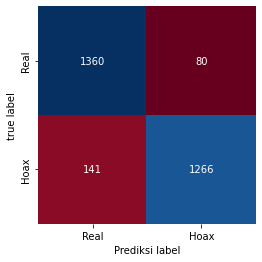

In [ ]:
sns.heatmap(matrix, square=True,annot=True,cbar=False,cmap='RdBu',
            xticklabels=['Real','Hoax'], yticklabels=['Real','Hoax'],fmt='g')
plt.xlabel('Prediksi label')
plt.ylabel('true label')

In [ ]:
from sklearn.metrics import classification_report
print("Hasil Klasifikasi: \n",classification_report(y_test, pred_rfc))

Hasil Klasifikasi: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1440
           1       0.94      0.90      0.92      1407

    accuracy                           0.92      2847
   macro avg       0.92      0.92      0.92      2847
weighted avg       0.92      0.92      0.92      2847



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

bayes = MultinomialNB()
bayes.fit(x_train_tfidf,y_train)

MultinomialNB()

In [ ]:
nb_result = bayes.predict(x_test_tfidf)
from sklearn import metrics
modelNB = metrics.accuracy_score(y_test, nb_result)
print("Akurasi Naive Bayes sebesar ",str('{:04.2f}'.format(modelNB*100))+'%')

Akurasi Naive Bayes sebesar  91.39%


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,nb_result)
print(matrix)

[[1323  117]
 [ 128 1279]]


In [ ]:
from sklearn.metrics import classification_report
print("Hasil Klasifikasi: \n",classification_report(y_test, nb_result))

Hasil Klasifikasi: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      1440
           1       0.92      0.91      0.91      1407

    accuracy                           0.91      2847
   macro avg       0.91      0.91      0.91      2847
weighted avg       0.91      0.91      0.91      2847



#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_tfidf,y_train)
pred_knn = knn.predict(x_test_tfidf)

In [ ]:
from sklearn import metrics
modelKNN = metrics.accuracy_score(y_test, pred_knn)
print("Akurasi KNeighbors Classifier sebesar ",str('{:04.2f}'.format(modelKNN*100))+'%')

Akurasi KNeighbors Classifier sebesar  86.90%


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,pred_knn)
print(matrix)

[[1266  174]
 [ 199 1208]]


In [ ]:
from sklearn.metrics import classification_report
print("Hasil Klasifikasi: \n",classification_report(y_test, pred_knn))

Hasil Klasifikasi: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1440
           1       0.87      0.86      0.87      1407

    accuracy                           0.87      2847
   macro avg       0.87      0.87      0.87      2847
weighted avg       0.87      0.87      0.87      2847




# Support Vector Machine

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

SVM = SVC(kernel='linear')
SVM.fit(x_train_tfidf,y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
predictions_SVM = SVM.predict(x_test_tfidf)
test_prediction = pd.DataFrame()
test_prediction['class'] = x_test
test_prediction['Judul'] = predictions_SVM
modelSVM = metrics.accuracy_score(y_test, predictions_SVM)
print("Akurasi model SVM sebesar ",str('{:04.2f}'.format(modelSVM*100))+'%')

Akurasi model SVM sebesar  93.33%


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train_tfidf,y_train)

LogisticRegression()

In [ ]:
pred_lr = LR.predict(x_train_tfidf)

In [ ]:
modelLR = LR.score(x_train_tfidf, y_train)
print("Akurasi model LR sebesar ",str('{:04.2f}'.format(modelLR*100))+'%')

Akurasi model LR sebesar  96.76%


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train,pred_lr)
print(matrix)

[[3284   73]
 [ 142 3143]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3357
           1       0.98      0.96      0.97      3285

    accuracy                           0.97      6642
   macro avg       0.97      0.97      0.97      6642
weighted avg       0.97      0.97      0.97      6642



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train_tfidf, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(x_test_tfidf)

In [ ]:
modelDT = DT.score(x_test_tfidf, y_test)
print("Akurasi model DT sebesar ",str('{:04.2f}'.format(modelDT*100))+'%')

Akurasi model DT sebesar  86.69%


In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1440
           1       0.86      0.88      0.87      1407

    accuracy                           0.87      2847
   macro avg       0.87      0.87      0.87      2847
weighted avg       0.87      0.87      0.87      2847



# MODEL TESTING

In [ ]:
def output_label(n):
  if n == 0:
    return 'Is Hoax!'
  elif n == 1:
    return "Not Hoax"
def manual_testing(Berita) :
  
  pred_knn= knn.predict(tfidf.transform([Berita]))
  pred_rfc = RFC.predict(tfidf.transform([Berita]))
  pred_NB = bayes.predict(tfidf.transform([Berita]))
  pred_lr = LR.predict(tfidf.transform([Berita]))
  pred_dt = DT.predict(tfidf.transform([Berita]))
  pred_SVM = SVM.predict(tfidf.transform([Berita]))

  return print("\n\nKNN : {} \nRFC : {} \nNB : {} \nLR : {} \nDT: {}\nSVM: {}" 
               .format(output_label(pred_knn[0]),
                       output_label(pred_rfc[0]),
                       output_label(pred_NB[0]),
                       output_label(pred_lr[0]),
                       output_label(pred_dt[0]),
                       output_label(pred_SVM[0])))


In [ ]:
Berita = input('Masukkan Judul Berita : ')
manual_testing(Berita)

Masukkan Judul Berita : Indonesia Bangkrutt


KNN : Is Hoax! 
RFC : Is Hoax! 
NB : Is Hoax! 
LR : Is Hoax! 
DT: Is Hoax!
SVM: Is Hoax!


#SAVE MODEL

In [ ]:
import pickle
filename = 'tfidf_vec.pkl'
pickle.dump(tfidf, open(filename ,'wb'))

In [ ]:
filename = 'rfc_model.pkl'
pickle.dump(RFC,open(filename,'wb'))

In [ ]:
import joblib
filename = 'tfidf.sav'
joblib.dump(tfidf,filename)

['tfidf.sav']

In [ ]:
filename = 'rfc.sav'
joblib.dump(RFC,filename)

['rfc.sav']

In [ ]:
filename = 'NB.sav'
joblib.dump(bayes,filename)

['NB.sav']

In [ ]:
filename = 'KNN.sav'
joblib.dump(knn,filename)

['KNN.sav']

#Prediksi Sistem

In [ ]:
loaded_model = joblib.load('rfc.sav')
mlb = joblib.load('tfidf.sav')

x_tes = []
for i in mlb.inverse_transform(x_test_tfidf):
  x_tes.append(" ".join(i))
categdf=pd.DataFrame({
    'x_test':x_test,
    'y_true':y_test,
    'y_pred':pred_rfc
})
print(categdf.count())
categdf['correct'] = np.where(categdf['y_true']==categdf['y_pred'], 'benar','salah')
display(categdf.style.highlight_max(color='#f00',subset=pd.IndexSlice[:,['correct']],axis=0))
categdf.to_excel('categdf.xls',index=False)

x_test    2847
y_true    2847
y_pred    2847
dtype: int64


,x_test,y_true,y_pred,correct
9358,bangun salur gusti ngurah sosialisasi kendara,1,1,benar
5680,password wifi jakarta,0,1,salah
7324,sinopsis 2021 eksplorasi hidup unabomber,1,1,benar
6565,persib bandung sita tangerang maung siap duet samba,1,1,benar
3341,meter kubik lumpur angkut kolam olak jalan kyai tapa,1,1,benar
5377,wali kota jaktim tinjau gerebek lumpur waduk munjul,1,1,benar
6278,hasil sita persik duel pendekar macan imbang,1,1,benar
7523,pernik tarik jelang laga sela arema,1,1,benar
7921,jelas lengkap duduk perkara kait video viral massa geruduk gereja sumatera utara,1,1,benar
4170,video boss china bantai pribumi amerika indonesia,0,0,benar


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  from ipykernel import kernelapp as app


#Diagram Pie

In [ ]:
predict_score = df['class'].value_counts()
predict_score

0    4797
1    1430
Name: class, dtype: int64

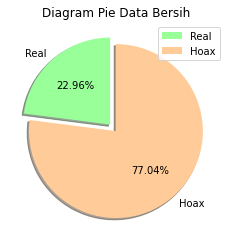

In [ ]:
labels = ['Real','Hoax']
Category1 = [1430,4797]
color=['#99ff99','#ffcc99']
plt.pie(Category1,labels=labels,colors=color,startangle=90,shadow=True,autopct='%1.2f%%',explode=(0.1,0))
plt.title('Diagram Pie Data Bersih')
plt.legend()
plt.savefig("pie.png")
plt.show()

In [ ]:
pred_score = test_prediction['class'].value_counts()
pred_score

0    1481
1     388
Name: class, dtype: int64

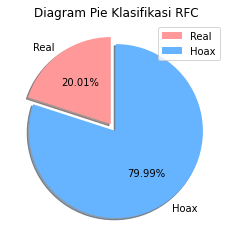

In [ ]:
labels = ['Real','Hoax']
Category2 = [374,1495]
color=['#ff9999','#66b3ff']
plt.pie(Category2,labels=labels,colors=color,startangle=90,shadow=True,autopct='%1.2f%%',explode=(0.1,0))
plt.title('Diagram Pie Klasifikasi RFC')
plt.legend()
plt.savefig("pie_rfc.png")
plt.show()